FIRST STEPS

In [ ]:
from utils import *

# Load datasets
train_images, train_labels = load_dataset_split('data/original/balanced/train')
val_images, val_labels = load_dataset_split('data/original/balanced/val')
test_images, test_labels = load_dataset_split('data/original/balanced/test')

# Create TensorFlow datasets (unchanged)
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Calculate class weights based on TRAINING SET
class_weights = compute_class_weight('balanced', 
                                   classes=np.unique(train_labels), 
                                   y=train_labels)
class_weight = {0: class_weights[0], 1: class_weights[1]}

# Model definition (unchanged)
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compile and train (unchanged)
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy", tf.keras.metrics.Precision(), 
                       tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6
)

history = model.fit(
    train_dataset,
    epochs=9,
    validation_data=val_dataset,
    class_weight=class_weight,
    callbacks=[early_stopping, reduce_lr]
)


test_loss, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test AUC: {test_auc}")

c:\Users\Nacho MPra\.conda\envs\fracture_detection\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/9
129/129 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - accuracy: 0.9148 - auc_2: 0.6681 - loss: 0.2902 - precision_2: 0.9442 - recall_2: 0.9338 - val_accuracy: 0.4158 - val_auc_2: 0.4940 - val_loss: 3.9421 - val_precision_2: 0.4158 - val_recall_2: 1.0000 - learning_rate: 0.0010
Epoch 2/9
129/129 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.8629 - auc_2: 0.6605 - loss: 0.3670 - precision_2: 0.9426 - recall_2: 0.8778 - val_accuracy: 0.5099 - val_auc_2: 0.6650 - val_loss: 1.0025 - val_precision_2: 0.4522 - val_recall_2: 0.8452 - learning_rate: 0.0010
Epoch 3/9
129/129 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - accuracy: 0.9075 - auc_2: 0.6716 - loss: 0.2601 - precision_2: 0.9560 - recall_2: 0.9224 - val_accuracy: 0.4183 - val_auc_2: 0.4894 - val_loss: 1.4130 - val_precision_2: 0.4125 - val_recall_2: 0.9405 - learning_rate: 0.0010
Epoch 4/9
129/129 ━━━━━━━━━━━━━━━━━━━━ 15s 114ms/step - accuracy: 0.8895 - auc_2: 0.6813 - loss: 0.2807 - precision_2: 0.9555 - recall_2: 0.9030 - val_accuracy:

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


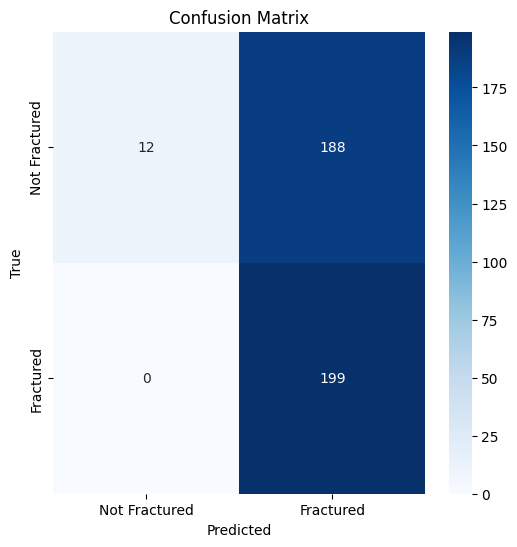

In [3]:
plot_conf_matrix(model, test_images, test_labels)

In [4]:
filename = 'binary_model_v1_balanced_inv.pkl'
create_pkl(filename, model)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


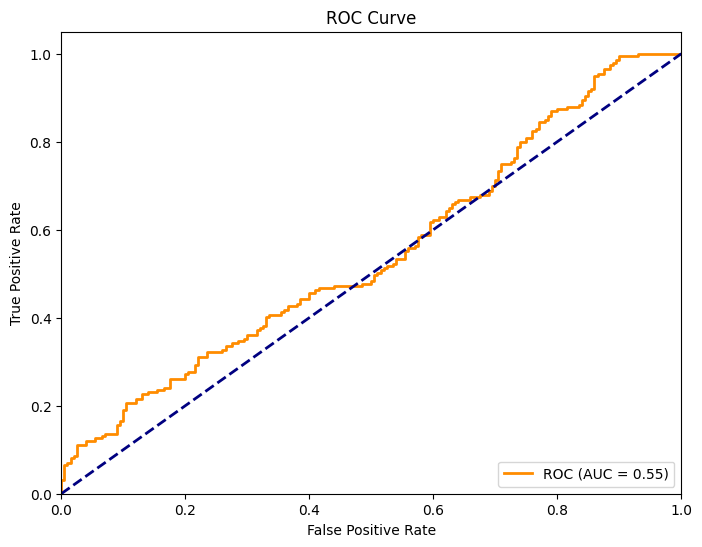

In [5]:
plot_roc_curve(model, test_images, test_labels)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


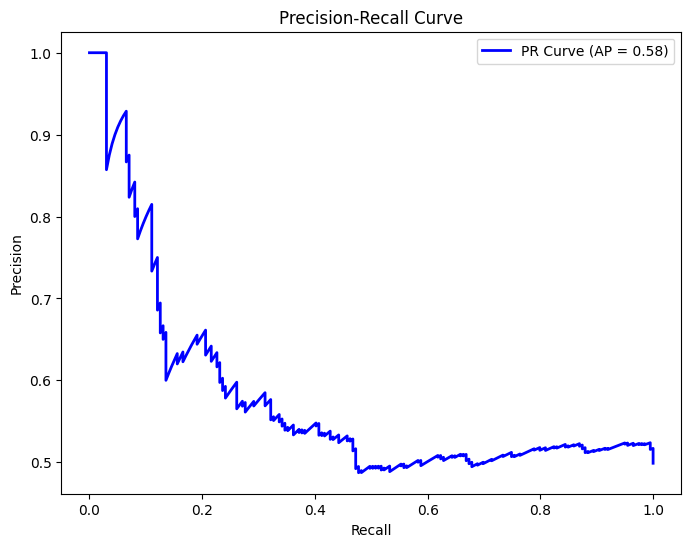

In [6]:
plot_pr_curve(model, test_images, test_labels)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


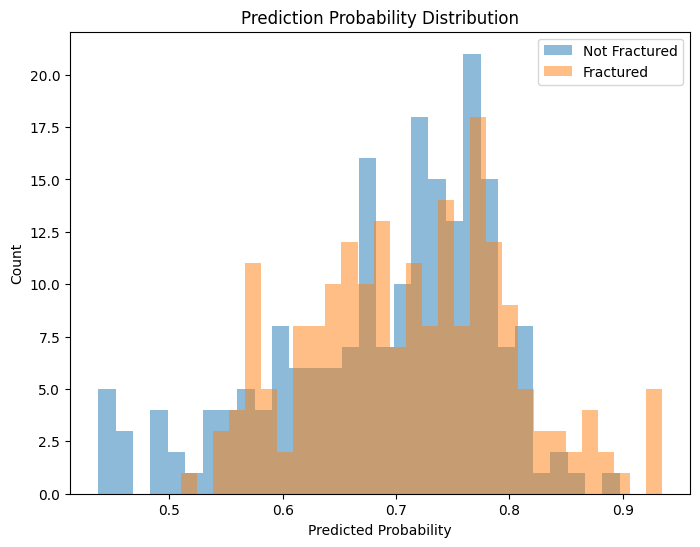

In [7]:
p_proba_dist(model, test_images, test_labels)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


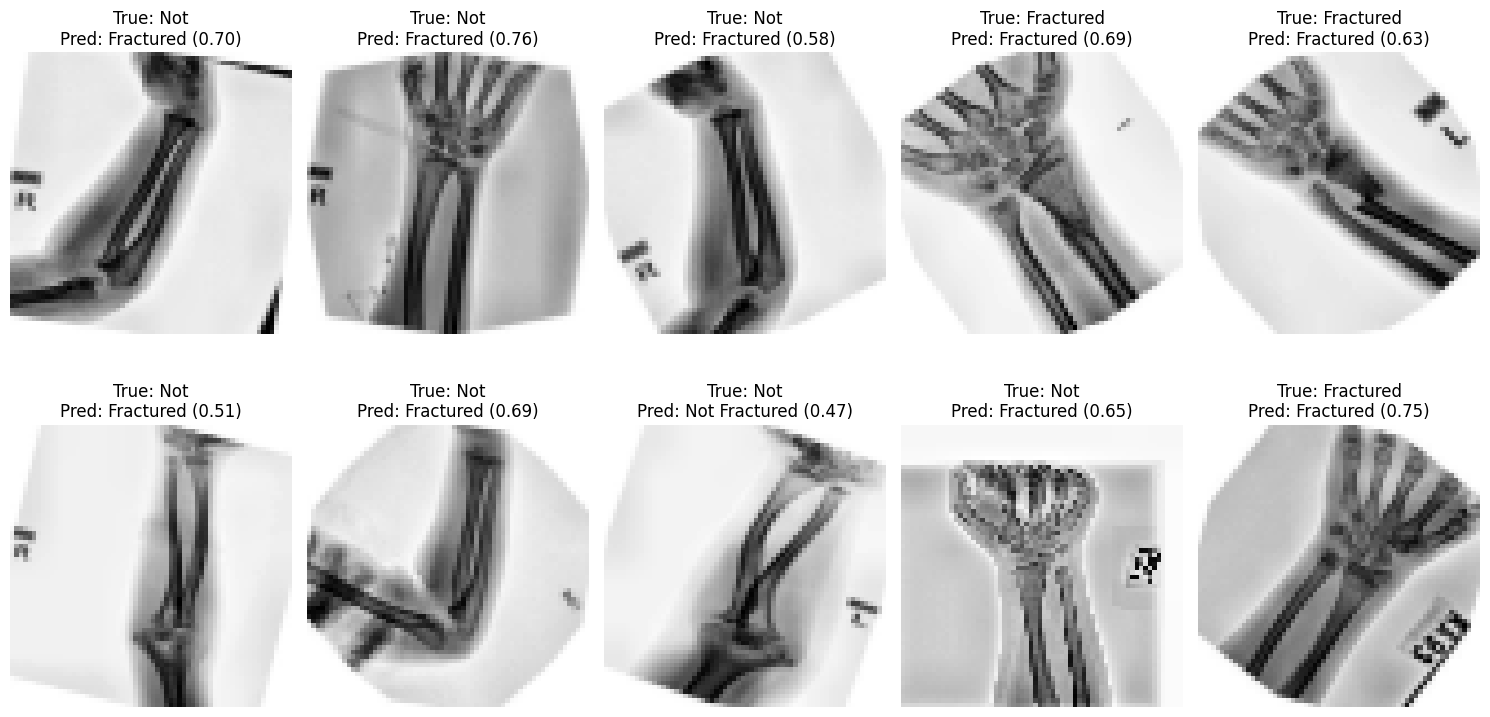

In [8]:
show_ten_samples(model, test_images, test_labels)

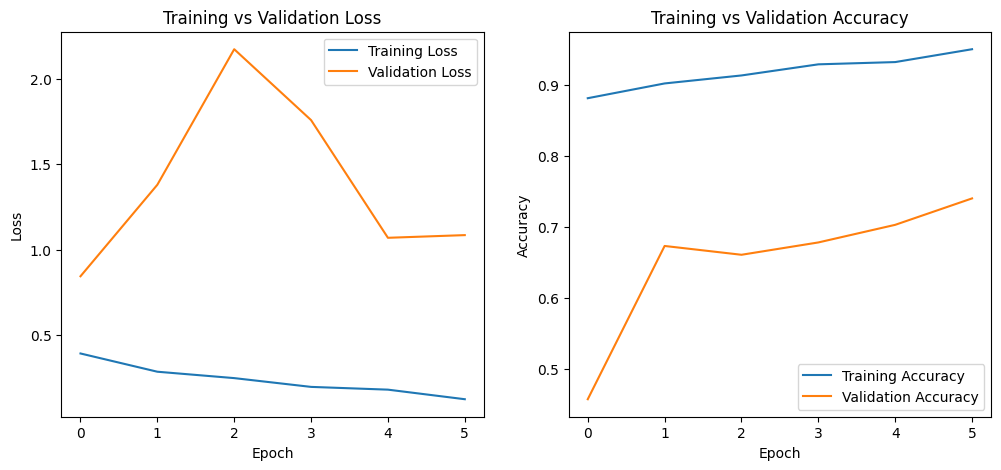

In [9]:
loss_accu_train(history)

Revisando las métricas, vamos a ajustar 8 epochs el modelo.